In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

## Task


Hi Adil,

take 1 subject from this and try to visualize the data and do some image manipulation in python (nibabel is a good library, or via Dipy)

Raw Pre-op: take the anat here https://tue.data.surfsara.nl/index.php/s/Esbp3oXTIFoyKMz
Raw Post-op: https://tue.data.surfsara.nl/index.php/s/ds0qbwmsHH8fJFy

Preprocessed pre op: take the dti fa https://tue.data.surfsara.nl/index.php/s/kNU67erWHurWEal
preprocessed post op: https://tue.data.surfsara.nl/index.php/s/YUECPUdnqGZpFM5

Best,
Max

### GOALS

MAIN PAPER -> https://arxiv.org/pdf/1810.09111.pdf

Work with data (extract stuff, voxel level, masking the bone)
work with their code in heatmaps
btc (brain tumour c)
raw for one thing
pre and post
control, patient, preop session, anat (take this, not aligned brain with diffusion. this is invariant) the gz file is the structural image of the brain

preprocessed, cleaned up diffusion
FA has different information, md as well

paper BTC aerts scientific report (pre and post surgery brain tumour)

RAW JUST ANATOMY	
IN PROCESSED JUST DTI FA MD

FSL Tool to extract bone (Brain Extraction tool)
MRtrix


## Loading

In [4]:
raw_preop = nib.load("./data/raw/preop/BTC-preop/sub-CON02/ses-preop/anat/sub-CON02_ses-preop_T1w.nii.gz")
raw_postop = nib.load("./data/raw/postop/BTC-postop/sub-CON02/ses-postop/anat/sub-CON02_ses-postop_T1w.nii.gz")

fa_proc_preop = nib.load("./data/processed/preop/fa.nii.gz")
fa_proc_postop = nib.load("./data/processed/postop/fa.nii.gz")

md_proc_preop = nib.load("./data/processed/preop/md.nii.gz")
md_proc_postop = nib.load("./data/processed/postop/md.nii.gz")

# This apparently returns voxel level of the data
data_raw_preop= raw_preop.get_fdata()
data_raw_postop= raw_postop.get_fdata()

data_fa_proc_preop= fa_proc_preop.get_fdata()
data_fa_proc_postop= fa_proc_postop.get_fdata()

data_md_proc_preop= md_proc_preop.get_fdata()
data_md_proc_postop= md_proc_postop.get_fdata()

In [5]:
def plot_slices(data, title, axes):
    # Define the slice indices for each dimension
    slice_indices = [
        (data.shape[0] // 2, slice(None), slice(None)),  # Slice along the first dimension
        (slice(None), data.shape[1] // 2, slice(None)),  # Slice along the second dimension
        (slice(None), slice(None), data.shape[2] // 2)    # Slice along the third dimension
    ]

    # Iterate over slice indices and plot each slice
    for i, (x, y, z) in enumerate(slice_indices):
        # Extract the chosen slice
        slice_data = data[x, y, z]

        # Plot the slice
        axes[i].imshow(np.rot90(slice_data), cmap='gray')  # Rotate slice for better visualization
        axes[i].set_title(f"{title} - Slice {i+1}")
        axes[i].axis('off')

## Visualize Base Images

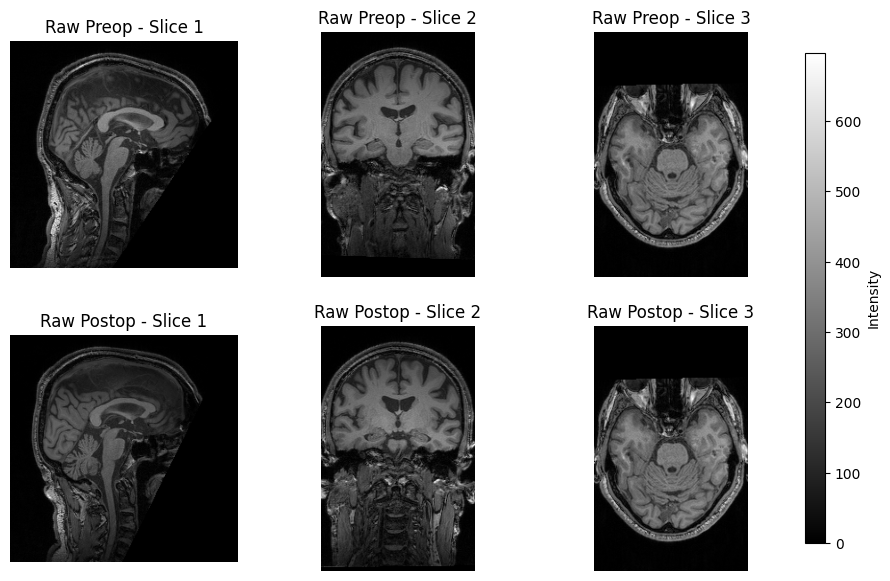

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


fig, axes = plt.subplots(2, 3, figsize=(10, 7))
plot_slices(data_raw_preop, 'Raw Preop', axes[0])
plot_slices(data_raw_postop, 'Raw Postop', axes[1])

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of colorbar
cbar = fig.colorbar(axes[1, 2].imshow(np.rot90(data_raw_preop[:, :, data_raw_preop.shape[2] // 2]), cmap='gray'), cax=cbar_ax)
cbar.set_label('Intensity')

# Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()


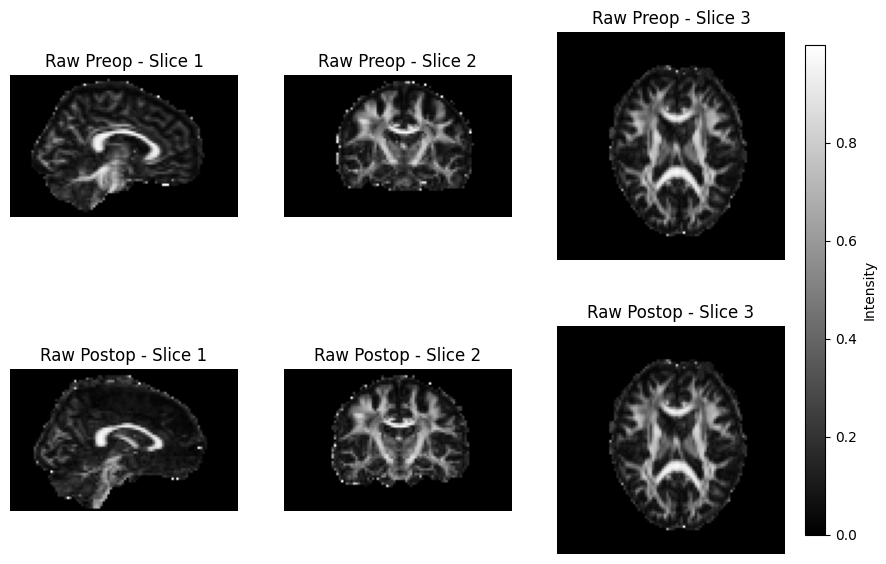

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
plot_slices(data_fa_proc_preop, 'Raw Preop', axes[0])
plot_slices(data_fa_proc_postop, 'Raw Postop', axes[1])

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of colorbar
cbar = fig.colorbar(axes[1, 2].imshow(np.rot90(data_fa_proc_preop[:, :, data_fa_proc_preop.shape[2] // 2]), cmap='gray'), cax=cbar_ax)
cbar.set_label('Intensity')

# Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()


## Visualize Mask Preop (remove bone structure)

Mask obtained through the bet command using FSL

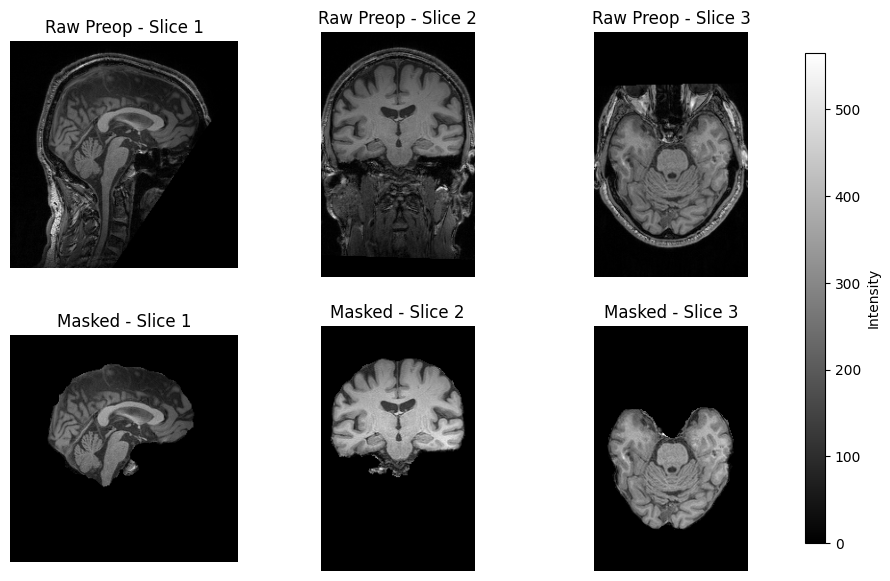

In [14]:
masked_raw_preop_extra = nib.load("./data/raw/preop/BTC-preop/sub-CON02/ses-preop/anat/sub-CON02_ses-preop_T1w.nii_mask.nii.gz")
masked_raw_preop = nib.load("./data/raw/preop/BTC-preop/sub-CON02/ses-preop/anat/sub-CON02_ses-preop_T1w.nii_mask.nii.gz")

masked_raw_data_extra = masked_raw_preop_extra.get_fdata()
masked_raw_data = masked_raw_preop.get_fdata()
fig, axes = plt.subplots(2, 3, figsize=(10,7))
plot_slices(data_raw_preop, 'Raw Preop', axes[0])
# plot_slices(masked_raw_data_extra, 'Masked extra', axes[1])
plot_slices(masked_raw_data, 'Masked', axes[1])


# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of colorbar
cbar = fig.colorbar(axes[1, 2].imshow(np.rot90(masked_raw_data[:, :, masked_raw_data.shape[2] // 2]), cmap='gray'), cax=cbar_ax)
cbar.set_label('Intensity')

plt.show()

## Visualize difference Preop and Postop

#### Not slicing here because I assume the sum is important?

In [15]:
def visualize_heatmap(voxel_data_preop, voxel_data_postop):
    # Load the NIfTI images
    # Calculate the voxel-wise difference
    difference = voxel_data_preop - voxel_data_postop

    # Plot heatmap for each dimension
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, dim in enumerate(['X', 'Y', 'Z']):
        heatmap = np.sum(difference, axis=i)
        im = axs[i].imshow(heatmap, cmap='hot', interpolation='nearest')
        axs[i].set_title(f'Difference Heatmap (Dimension {dim})')
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')
        axs[i].axis('off')

    # Add a single colorbar for all heatmaps
    cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_12977/3577908684.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


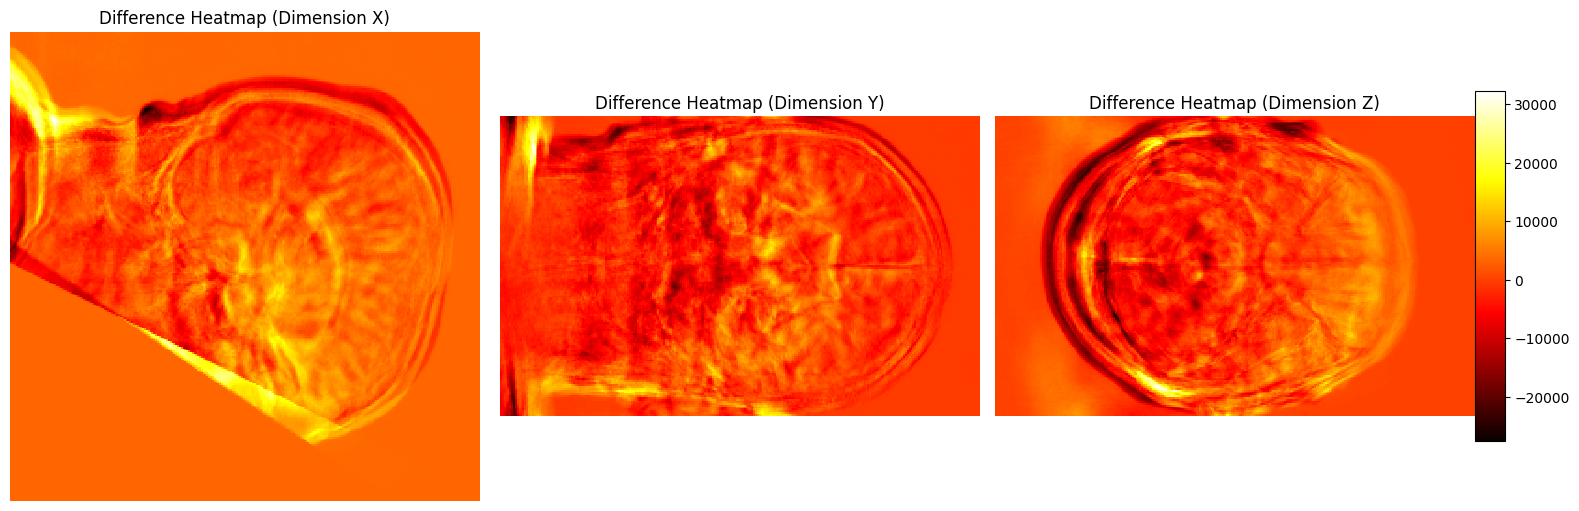

In [16]:
visualize_heatmap(data_raw_preop, data_raw_postop)

## Slicing manually

In [17]:
inverse = np.linalg.inv(raw_preop.affine)
inverse@np.array([0, 0, 0, 1])

array([ 78.8977672 , 106.34534306, 134.56812874,   1.        ])

In [18]:
midpoint_mask = np.zeros(raw_preop.shape)
midpoint_mask[44:47, 62:65, 35:38] = 1

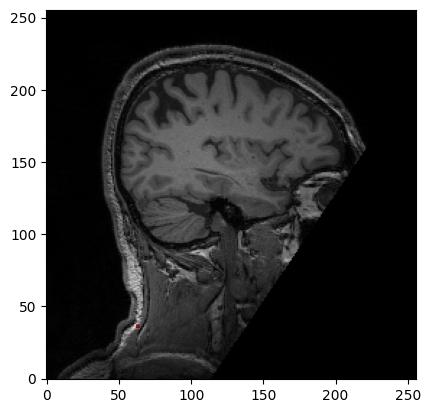

In [19]:
fig, ax = plt.subplots()
ax.imshow(data_raw_preop[45, :, :].T, cmap="gray", origin="lower") # The transposed matrix is used to correctly allign the axes
ax.imshow(midpoint_mask[45, :, :].T, cmap="Reds", origin="lower", alpha=np.where(midpoint_mask[45, :, :].T, 0.8, 0))

In [52]:
#!mrview
# with conversion to mif file and then trying to mask it it still errors.

#bet sub-CON02_ses-preop_T1w.nii.gz output_brain_mask.nii.gz -f 0.2 -g 0 -m

FA seems to quantify the diffusion of water, giving an indication of how well-organized or damaged certain white matter tracts are

## Some manipulation

In [20]:
# Normalize the image to [0, 1] range
min_value = np.min(data_raw_preop)
max_value = np.max(data_raw_preop)
normalized_data = (data_raw_preop - min_value) / (max_value - min_value)

# Save the normalized image (if needed)
normalized_img = nib.Nifti1Image(normalized_data, raw_preop.affine)
normalized_preop = normalized_img.get_fdata()

### Normalizing

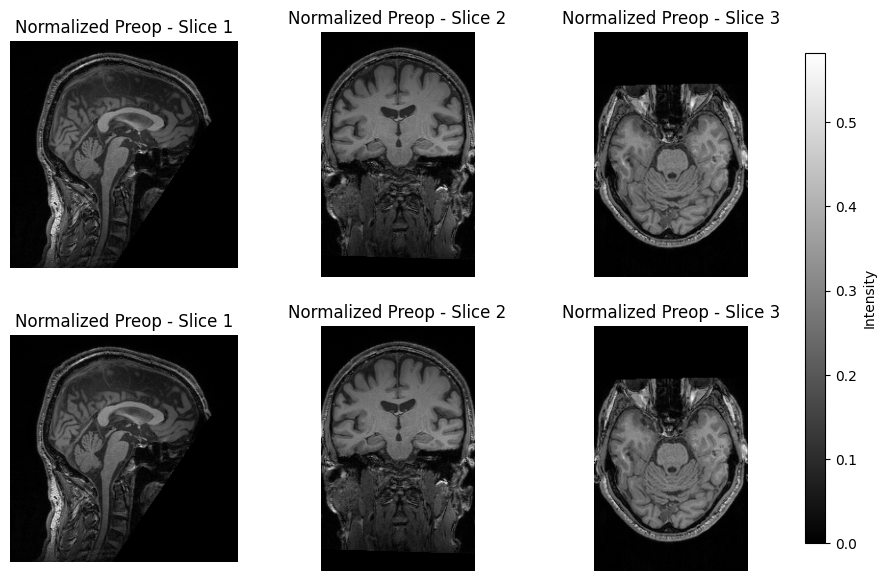

: 

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
plot_slices(normalized_preop, 'Normalized Preop', axes[0])
plot_slices(normalized_preop, 'Normalized Preop', axes[1])

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of colorbar
cbar = fig.colorbar(axes[1, 2].imshow(np.rot90(normalized_preop[:, :, normalized_preop.shape[2] // 2]), cmap='gray'), cax=cbar_ax)
cbar.set_label('Intensity')

# Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()


### Plan

Make pairs -> Train Change detection algorithm based on Siamese networks -> Use TCL

"detect changes based on directly comparing and measuring the dissimilarity between pairs of images at
different times."

NOTE:
- Cant use few-shot learning since theres no classes?
- Low amount of data

## Next time (20th june prep phase)
- Start with the overleaf introduction
- Try passing data to siamese networks (CON/Patient pairs)
- Try first on T1, then move into FA/MD (each its own network)

## To think about
- later on add a second class (multiple sclerosis)
- later on fact check the position with a different tool
- later on try it with tracts